In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from scipy import interpolate
seaborn.set()

案例一：多项式拟合

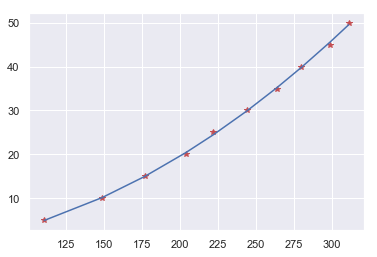

In [2]:
x = np.array([111, 149, 177, 204, 222, 244, 264, 280, 299, 311])
y = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
A = np.polyfit(x, y, 2)
z = np.polyval(A, x)
fig, ax = plt.subplots()
ax.plot(x, y, 'r*', x, z, 'b');

案例二：含变量替换的多项式拟合

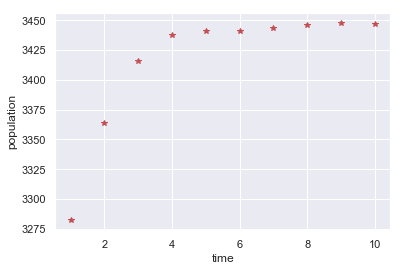

In [3]:
x = np.arange(1, 11)
y = np.array([3282, 3364, 3416, 3438, 3441, 3441, 3444, 3446, 3448, 3447])
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')
ax.set(xlabel='time', ylabel='population');

In [4]:
x0 = np.exp(-x)
y0 = 1 / y
f = np.polyfit(x0, y0, 1)
print(f[0]) #一次项
print(f[1]) #常数项
print('y0 = %f * x0 + %f' % (f[0], f[1]))

4.034032285068002e-05
0.00029039966909197193
y0 = 0.000040 * x0 + 0.000290


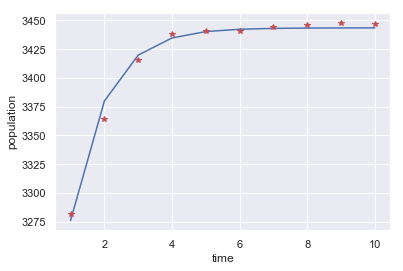

In [5]:
y_fit = 1 / np.polyval(f, x0)
fig, ax = plt.subplots()
ax.plot(x, y_fit, x, y, 'r*')
ax.set(xlabel='time', ylabel='population');

案例二（高端操作）

In [6]:
res = smf.ols('I(1 / y) ~ I(np.exp(-x))', pd.DataFrame({'y':y, 'x':x})).fit()
res.summary()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               I(1 / y)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     577.6
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           9.57e-09
Time:                        12:31:43   Log-Likelihood:                 130.39
No. Observations:                  10   AIC:                            -256.8
Df Residuals:                       8   BIC:                            -256.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0003    2.1e-07   1382.937      0.000       0.000       0.000
I(np.exp(-x))  4.034e-05   1.68e-06     24.034      0.000    3.65e-05    4.42e-05
==============================================================================
Omnibus:                       14.474   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.290
Skew:                           1.748   Prob(JB):                       0.0261
Kurtosis:                       5.296   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
print('y_fit = 1 / (%f + %f * exp(-x))' % tuple(res.params))

y_fit = 1 / (0.000290 + 0.000040 * exp(-x))


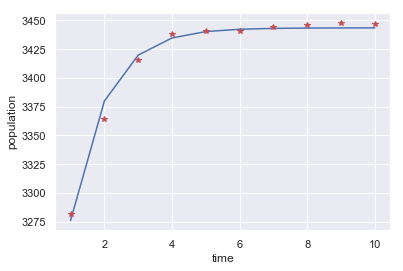

In [8]:
fig, ax = plt.subplots()
ax.plot(x, 1 / res.fittedvalues, x, y, 'r*')
ax.set(xlabel='time', ylabel='population');

案例三

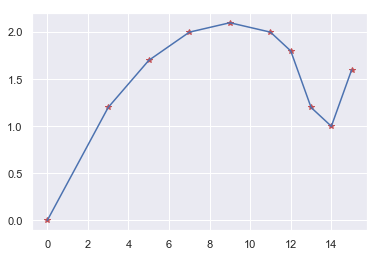

In [9]:
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])
x1 = np.arange(0, 15.1, 0.1)
f = interpolate.interp1d(x, y)
y2 = f(x1)
fig, ax = plt.subplots()
ax.plot(x, y, 'r*', x1, y2);

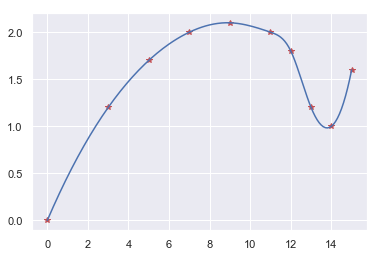

In [10]:
x1 = np.arange(0, 15.1, 0.1)
g = interpolate.interp1d(x, y, kind='cubic')
y1 = g(x1)
fig, ax = plt.subplots()
ax.plot(x, y, 'r*', x1, y1);

案例四

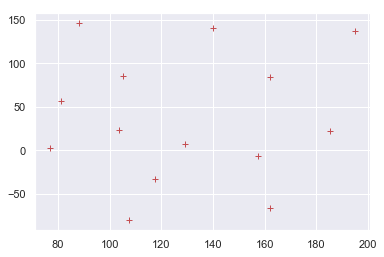

In [11]:
x = np.array([129, 140, 103.5, 88, 185.5, 195, 105,\
              157.5, 107.5, 77, 81, 162, 162, 117.5])
y = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5,\
              -6.5, -81, 3, 56.5, -66.5, 84, -33.5])
fig, ax = plt.subplots()
ax.plot(x, y, 'r+');